# Introduction to Jupyter Notebooks
---
## How to use notebooks

Notebooks are non-linear tools used during thinking, but are often rewritten into linear narratives for communication. If you are starting a project then your notebook may be chaotic but as you refine the idea or solution it should be rewritten into a form that clearly explains what the problem is and how you solved it.

### Best Practices

Notebook style guidelines:

- Short code cells are better than long ones
- Markdown should explain why, not restate code
- Comments explain intent, not syntax
- Plots should always have labeled axes

---
## Introduction
A Jupyter notebook combines markdown, html, and $\LaTeX$ along with code blocks to create powerful electronic notebooks. Lets delve into what they can offer with some examples. On the linux laptops open a browser window then in a terminal window and type: <tt>jupyter notebook</tt> A directory structure page should pop up in the browser. Navigate to where you want to create the Jupyter notebook file then use the <tt>new</tt> button to create a Python3 notebook which will open in a new browser tab. The file we are looking at now is a notebook. Your Google Drive has something similar called Colaboratory. The functionaity is very similar except: if Colaboratory stays idle for too long it disconnects from the Google servers and it "forgets" what was run previously. Hence, any imported libraries, variable declarations, etc, are "gone". You just have to re-run the code cells to re-load those items. Secondly, any files that are created and saved in the cloud get deleted when the server disconnets. Be sure to download or transfer these files to your Google Drive if you want to retain them. Of course, you could re-run the code cells and regenerate the plots or files (unless these are time consuming).

For our purpose, the Jupyter Notebook on your own laptop will retain all the files created when it is run and won't forget variables unless it the notebook is shut down. Just rerun the code cells to bring everything back.

### Markdown
Markdown combines a bit of html and LaTeX to create simple text formatting. Double click a text cell to see the raw Markdown. I never can remember how to do everything so I end up Googling something like "Markdown cheatsheet" to remind myself. Here's an [example](https://www.markdownguide.org/cheat-sheet/) here's [another](https://daringfireball.net/projects/markdown/basics).

### $\LaTeX$
Love it or hate it LaTeX is a way to get beautiful mathematical equation formatting. Thankfully, Markdown understands it. Here's an example of a simple in-line equation: $y=mx+b$. Here's an example of an equation offset from the text:
$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.$$ (There are some hacky workarounds to get equation numbering to work apparently - I haven't tried them.) As with Markdown I sometimes have to refer to a $\LaTeX$ cheat sheet like [this](http://tug.ctan.org/info/undergradmath/undergradmath.pdf).

### Python
Jupyter notebooks understand Python code (and may other languages). The code blocks in Jupyter notebooks are separate from the text blocks we have been working in thus far. A simple code block appears below:

In [1]:
# a comment line most useful to your future self
print("Hello World!")

Hello World!


As is customary, our first executed line of code is the familiar Hello world! Edit the above code block to print something else to the screen. There are *many* useful Python libraries out there - we will focus on `numpy` and `matplotlib` 

Let's first start with a coding challenge from [Project Euler](https://projecteuler.net/)

---

### Multiples of 3 and 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

---
So, how should we solve this? Can we find numbers less than 10 that are multiples of 3 or 5?

In [1]:
i = 1 # pick a starting value
while i < 10: # loop keeps repeating until this condition is FALSE
  if i % 3 == 0 or i % 5 == 0: # the % symbol is the modulo operator
    # The modulo operator returns the remainder of dividing the left hand 
    # operand by right hand operand. the double equals sign, ==, asks if it is
    # true that the left side equals the right side. if i is divisible by 3 
    # with no remainder OR if i is divisible by 5 with no remainder
    print(i) # print values that satisfy this condition
  i = i + 1 # increment i otherwise the loop runs forever

3
5
6
9


Great! Our code reproduces the expected values for numbers less than 10. Now, lets modify the code to automatically compute the sum of these numbers instead of printing them to the screen.

In [1]:
i = 1
my_sum = 0
while i < 1000:
  if i % 3 == 0 or i % 5 == 0:
    my_sum = my_sum + i # this will automatically keep a running sum of the values 
                  # that satisfy our condition.
  i = i + 1 # don't forget to increment i

# once the while condition fails (ie i > or = 10) we want to print our result
print(my_sum)

233168


Woohoo! That seems to be what we want. Edit the above code block to find the sum of all natural numbers less than 1000 that are divisible by 3 or 5. That answer is: **233168**

### Simple Plotting
We would like to be able to use Python and it's plotting library `matplotlib` to generate plots to analyze functions or data. Again, I often have to refer to a [guide](https://matplotlib.org/) for help. Let's dive in!

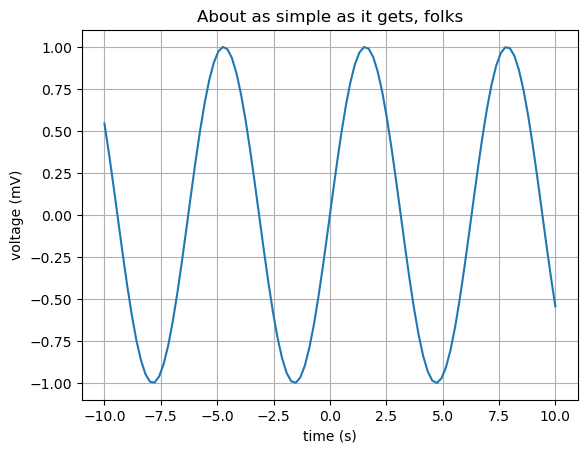

In [6]:
import matplotlib.pyplot as plt # this imports the library and 
                                # shortens its name to plt
import numpy as np

def my_function(t,omega,phi): # this is how a function is defined'
  y = np.sin(omega*t + phi)
  return y

t_values = np.linspace(-10,10,100) # values from -10 to 10 in 100 steps

fig, ax = plt.subplots() # this sets up the plotting environment
ax.plot(t_values, my_function(t_values,1,0)) #this makes the plot

# following line labels the axes and the plot title
ax.set(xlabel='time (s)', ylabel='voltage (mV)', 
        title='About as simple as it gets, folks')
ax.grid() # introduces the gridlines

fig.savefig("test.png") # this saves the figure as an image file
                        # (click folder icon if on Colaboratory!)
plt.show() # this displays the plot on the screen

Pretty cool, huh? Now let's try something a little more complex.

### Complex Function Plotting

From the lab we have a modified integrator gain formula given by,
$$G(\omega) = -\frac{R_f}{R_{in}}\frac{1}{1+j\frac{\omega}{\omega_{RC}}}.$$

This is an obviously complex formula (note the $j$ in the denominator). Recall that complex numbers (or formulas) can be written as: (real part) + j (imaginary part). The **magnitude** is given by,
$$|G| = \sqrt{(\textrm{real part})^2 + (\textrm{imag part})^2}.$$

The **phase** is given by,
$$\phi = \arctan\left(\frac{\textrm{imag part}}{\textrm{real part}}\right).$$

The `numpy` [library](https://numpy.org/doc/stable/index.html) has commands to determine the magnitude and the phase as we shall see. Let's start with a simple example:

In [3]:
import numpy as np

j = complex(0,1) # the format is: complex(real part , imaginary part)

z = 1 + j*1 # yes, I could have written z = complex(1,1) but sometimes its
            # nice to be explicit in the notation

print(np.real(z)) # print the real part of z
print(np.imag(z)) # print the imaginary part of z

print(np.abs(z)) # print the magnitude of z
print(np.angle(z)) # print the phase angle (in radians) of z
print(np.angle(z,deg=True)) # print the phase angle (in degrees) of z

1.0
1.0
1.4142135623730951
0.7853981633974483
45.0


So, for any complex number we can use `np.abs()` and `np.angle()` to extract the magnitude and phase information.

In [4]:
# note: j has to be defined (and initialzed) in a prior cell or included here
def gain(omega, omegaRC, Rin, Rf):
  first_part = - Rf / Rin
  second_part = 1 / (1 + j * omega / omegaRC)
  return first_part * second_part

In the code block above we have defined our complex gain function, $G(\omega)$, in terms of our variables of interest: $R_{in}$, $R_f$, and $\omega_{RC}$. In the next code block we'll make a plot of the magnitude and phase of this function:

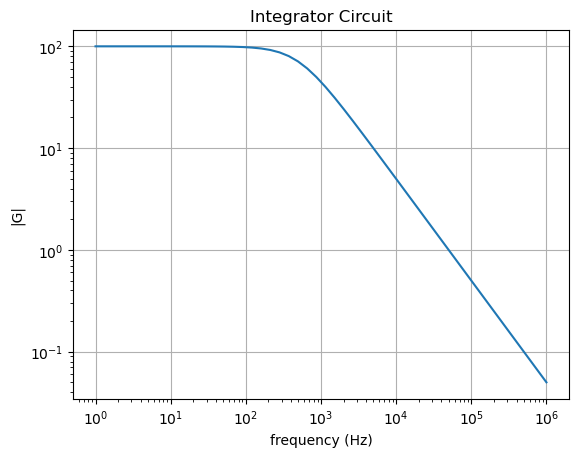

In [8]:
# Define some values
Rin = 1 * 10**3 # Ohms
Rf = 100 * 10**3 # Ohms
omegaRC = 2*np.pi*500

# starting point = 10 ** start value
# ending point = 10 ** end value 
freq = np.logspace(0,6,num=50,endpoint=True,base=10)
omega = 2*np.pi*freq

fig, ax = plt.subplots()
ax.loglog(freq, np.abs(gain(omega,omegaRC,Rin,Rf))) # note the log-log axes!

ax.set(xlabel='frequency (Hz)', ylabel='|G|',
       title='Integrator Circuit')
ax.grid()

fig.savefig('integrator_gain.png')
plt.show()

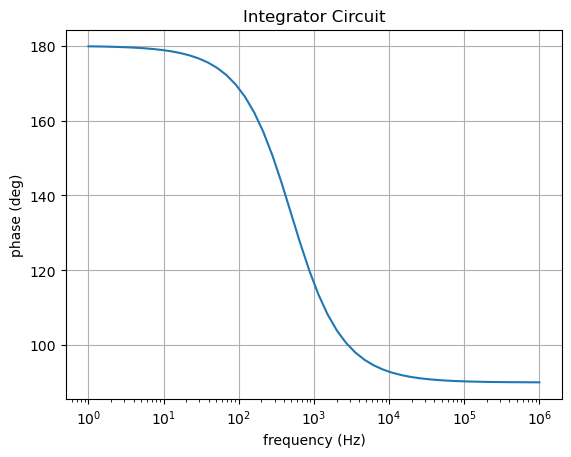

In [9]:
# hint - if running this cell block results in an error
# you might have to run a previous code cell to import
# a library or define a function or variables
fig, ax = plt.subplots()
ax.semilogx(freq,np.angle(gain(omega,omegaRC,Rin,Rf), deg=True)) # note the log-linear axes!
ax.set(xlabel = 'frequency (Hz)', ylabel = 'phase (deg)', 
      title = 'Integrator Circuit')
ax.grid()

fig.savefig('integrator_phase.png')
plt.show()

Isn't that pretty!?

# More Fancy Stuff
We would also like to import data for a plot, fit that data to a theoretical model to determine fit parameters or coefficients (like the slope and intercept of a line), and also change the style of the plot by modifying the default colors and line style.

## Importing data for a plot
Let's say you have taked experimental data and want to import it for plotting. If there isn't too much data you could do the following:

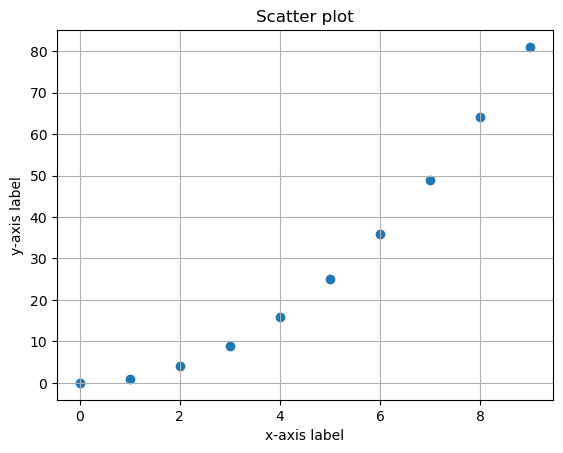

In [10]:
import matplotlib.pyplot as plt

x_values = [0,1,2,3,4,5,6,7,8,9]
y_values = [0,1,4,9,16,25,36,49,64,81]

fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.set(xlabel = 'x-axis label', ylabel = 'y-axis label', 
        title = 'Scatter plot')
ax.grid()

fig.savefig('scatter_plot_1.png',dpi=300) # the dpi setting can change the 
                                          # default dots per inch (ie change 
                                          # the resolution)
plt.show()

**Note:** Scatter plots are for discrete data values. You (generally) don't want any connecting lines or curves between values (unless you have too-few data points and need to visualize the trend in the data better). Smooth curves or continous lines are for functions or theoretical models.

If you have a **LOT** of data you probably will already have it in an appropriate file format or you will need to record it that way. Thankfully, if you have recorded your data in a spreadsheet you can copy+paste the data into a text file and upload it to the working folder and import it using `np.loadtxt`, see details [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).

In [11]:
import numpy as np
# note: the file you load can be anywhere - just need to provide the correct path to it.
log_amp_data = np.loadtxt('log-amplifier.txt', float) # this file is in the same location as the notebook file
print(log_amp_data)

[[ 1.     -0.5996]
 [ 2.     -0.6323]
 [ 3.     -0.6517]
 [ 4.     -0.6649]
 [ 5.     -0.6749]
 [ 6.     -0.6828]
 [ 7.     -0.6893]
 [ 8.     -0.6952]
 [ 9.     -0.7   ]
 [10.     -0.7046]
 [11.     -0.7088]
 [12.     -0.7124]
 [13.     -0.7152]
 [14.     -0.7178]
 [15.     -0.7209]]


Notice that `np.loadtxt()` ignored the # line because it assumed that was a comment and not data. The first column is the input voltage and the second column is the output voltage. We can extract that using list slicing:

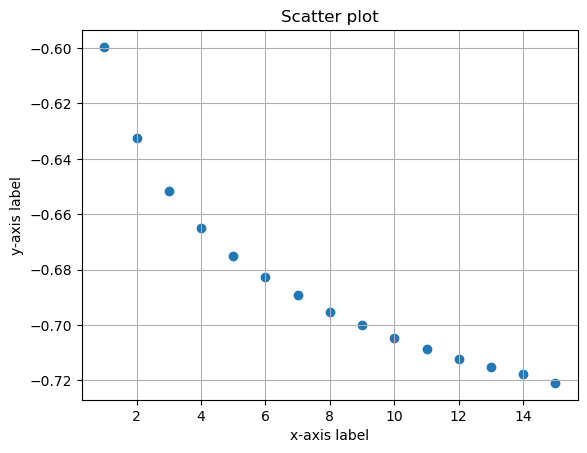

In [12]:
Vin = log_amp_data[:,0] # everything in the first column
Vout = log_amp_data[:,1] # everything in the second column

fig, ax = plt.subplots()
ax.scatter(Vin, Vout)
ax.set(xlabel = 'x-axis label', ylabel = 'y-axis label', 
       title = 'Scatter plot')
ax.grid()

fig.savefig('scatter_plot_2.png')
plt.show()

Since this is the log-amplifier data we want to display it a little differently to facilitate analysis. We want to take the natural log of the input voltage and plot that on the x-axis.

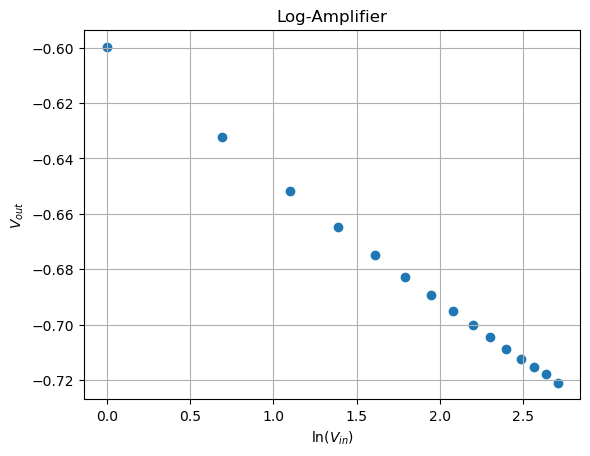

In [15]:
ln_Vin = np.log(log_amp_data[:,0]) # everything in the first column
Vout = log_amp_data[:,1] # everything in the second column

fig, ax = plt.subplots()
ax.scatter(ln_Vin, Vout)
ax.set(xlabel = '$\\ln(V_{in})$', ylabel = '$V_{out}$', title = 'Log-Amplifier')
ax.grid()

fig.savefig('scatter_plot_2.png')
plt.show()

Great! We want to fit this data to a straight line to determine intrinsic parameters of the diode ($m$ and $I_s$).

## Curve Fitting
There are a lot of ways to do a curve fit and the mathematics behind what is going on is fascinating. However, here we just want to have a technique that works that we can apply to many situations. A good library for scientific python (including curve fitting) is called `scipy`. The documentation of the curve fitting portion of `scipy` can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). We need to first import the relevant part of the library:


In [16]:
from scipy.optimize import curve_fit

then we need to define the function we want to fit. In this case, a linear function:

In [17]:
def my_fit(x,a,b):
  return a*x + b

Now we can call the `curve_fit` routine on the data we have already uploaded and fit that data to our linear function to determine the best values of $a$ and $b$. From these fitted parameters we can then solve for the unknowns of interest.

In [18]:
popt, pcov = curve_fit(my_fit, ln_Vin, Vout)

popt # return the fitted parameters in the order they appear in my_fit function

array([-0.0445576 , -0.60181837])

Great! We have an estimate for the slope, $-0.0445576$, and the intercept, $-0.60181837$. These values could be used in other calculations as needed. Here, we just are focusing on plotting data and functions.

## Multiple plots

We would like to be able to include the data as a scatter plot and the fit as a continous plot on the same graph. It will also be nice to have these plots be distinctive.

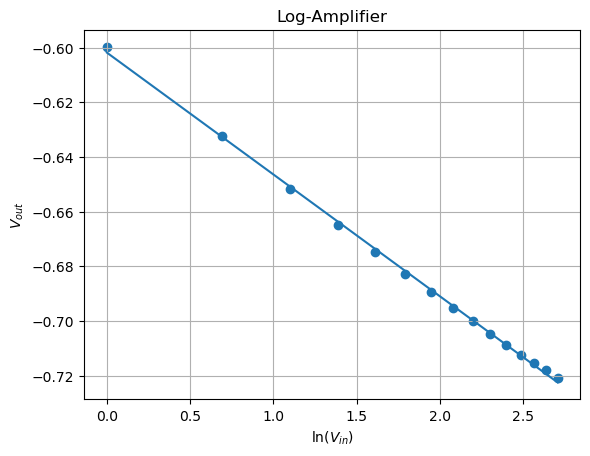

In [20]:
fig, ax = plt.subplots()
ax.scatter(ln_Vin, Vout)
ax.plot(ln_Vin,my_fit(ln_Vin,*popt)) # the *popt just puts the values from the 
                                     # fit into the other variables
                                     # you could also just type in the fitted
                                     # parameters into the fit function
ax.set(xlabel = '$\\ln(V_{in})$', ylabel = '$V_{out}$', title = 'Log-Amplifier')
ax.grid()

fig.savefig('multi_plot.png')
plt.show()

Nice! Let's try to pretty this up a bit.

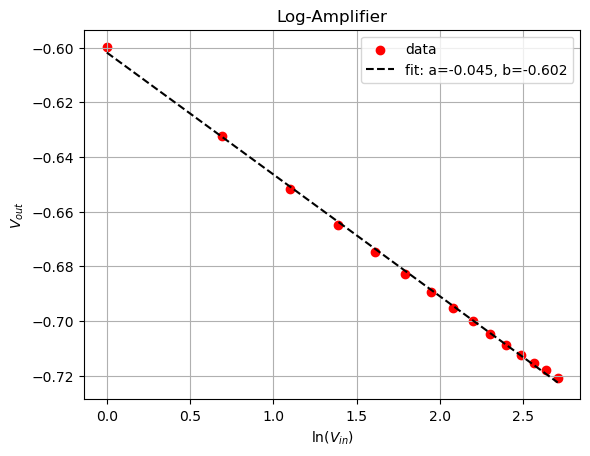

In [21]:
fig, ax = plt.subplots()
ax.scatter(ln_Vin, Vout, color = 'red', label='data') # make the filled 
                                                      # circles red
ax.plot(ln_Vin,my_fit(ln_Vin,*popt), linestyle = 'dashed', color = 'black',
        label='fit: a=%5.3f, b=%5.3f' % tuple(popt)) # this is a fancy way of 
                                                     # putting the values into 
                                                     # the label. You can always
                                                     # just type them in as 
                                                     # text too.

ax.set(xlabel = '$\\ln(V_{in})$', ylabel = '$V_{out}$', title = 'Log-Amplifier')
ax.grid()
ax.legend() # include the legend using the labels from the plot commands
fig.savefig('multi_plot.png')
plt.show()

And there we have it! A nice plot of data with a theoretical model fit to determine parameters of interest. There is more that could be done - we could add minor tick marks, change the font and style of the axes, etc. All of those changes are just a Google search away!

# Even *more* fun stuff

Let's demonstrate how to model a simple mass-spring system (ie numerically solving an ordinary differential equation).

## Mass-Spring System
Recall that for a mass, $m$, attached to a spring with spring constant, $k$, sliding on a frictionless surface we have the following for Newton's 2nd Law:
$$m\frac{dv}{dt} = -kx$$
where the mass has velocity $v$ and position $x$. The average velocity is defined as,
$$v_{ave} = \frac{dx}{dt}.$$
If we consider finite time intervals then $dt\rightarrow\Delta t$ and we can rewrite our equations as,
\begin{eqnarray}
v_f & = & v_i - \frac{k}{m}x\Delta t \\
x_f & = & x_i + v_{ave} \Delta t\\
v_{ave} & = & \frac{v_f+v_i}{2}
\end{eqnarray}

![mass-spring.png](mass-spring.png)

Assume the mass is pulled to the side a distance $x_0 = 0.1$ at $t=0$ and released from rest, $v_0=0$. Now let's model the motion using Python!

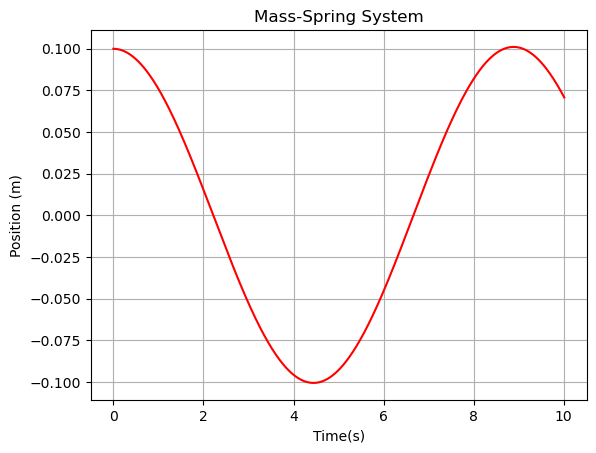

The period in seconds is =  8.885758370831383


In [22]:
import matplotlib.pyplot as plt

# define constants
m = 2 # mass in kg
k = 1 # spring constant in N/m
delta_t = 0.01 # time increment for the numerical modeling
# define initial conditions
xi = 0.1 # initial position in m
vi = 0 # initial velocity in m/s
t = 0 # initial time in s

x_values = []
x_values.append(xi) # append() is how a value is added at the end of an array
v_values = []
v_values.append(vi)
t_values = []
t_values.append(t)

# simulate!
while t < 10:
    # calculate new velocity
    vf = vi - (k/m)*xi*delta_t
    # calculate average velocity
    vave = (vi + vf) / 2
    # calculate new position
    xf = xi + vave*delta_t
    # calculate new time
    t = t + delta_t
    # append the values
    x_values.append(xf)
    v_values.append(vf)
    t_values.append(t)
    # the final values become the initial values for the next loop
    xi = xf
    vi = vf

# make a plot

fig, ax = plt.subplots()
ax.plot(t_values,x_values, color = 'red')

ax.set(xlabel = 'Time(s)', ylabel = 'Position (m)', title = 'Mass-Spring System')
ax.grid()
fig.savefig('mass-spring-motion.png')
plt.show()

# calcualte period, T
omega = (k/m)**0.5
T = 2*3.14159/omega
print("The period in seconds is = ", T)

Pretty cool, huh?!

What if we wanted to include linear damping? What changes would we need to make to the code?